In [165]:
# Without negative predictions
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np 

using pandas to read dataset

In [166]:
# past your own path
dataset = pd.read_csv(r"E:\Machine Learning\datasets\covid19.csv")

Checking dataset top 5 columns

In [167]:
dataset.head()

,Locations,Total cases,Reported deaths,Discharged cases
0,Mainland China,80703,3098,57333
1,South Korea,7313,50,130
2,Iran,6566,194,2134
3,Itay,5883,233,589
4,Germany,951,0,18


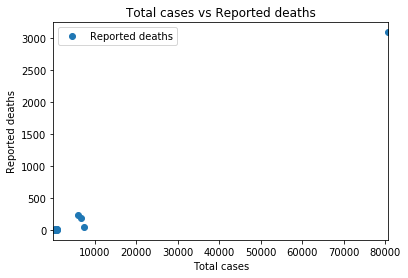

In [168]:
dataset.plot(x='Total cases', y='Reported deaths', style='o')  
plt.title('Total cases vs Reported deaths')  
plt.xlabel('Total cases')  
plt.ylabel('Reported deaths')  
plt.show()

In [169]:
X = dataset['Total cases'].values.reshape(-1,1)
y = dataset['Reported deaths'].values.reshape(-1,1)

Preparing for train test split

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training the algorithm

In [171]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-4.26408542]
[[0.03819074]]


Saving the predicted values in array

In [173]:
y_pred = regressor.predict(X_test)

In [174]:
# Converting negative predictions to 0
for i in range(len(y_pred)):
    if y_pred[i] < 0:
        y_pred[i] = 0
np.asarray(y_pred)


array([[  0.        ],
       [  0.        ],
       [246.49628105],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  1.46452485],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  3.4886338 ],
       [ 19.14683518],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [ 14.90766359],
       [  0.        ]])

In [175]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,4,0.000000
1,0,0.000000
2,194,246.496281
3,0,0.000000
4,0,0.000000
5,0,0.000000
6,0,1.464525
7,0,0.000000
8,1,0.000000
9,0,0.000000


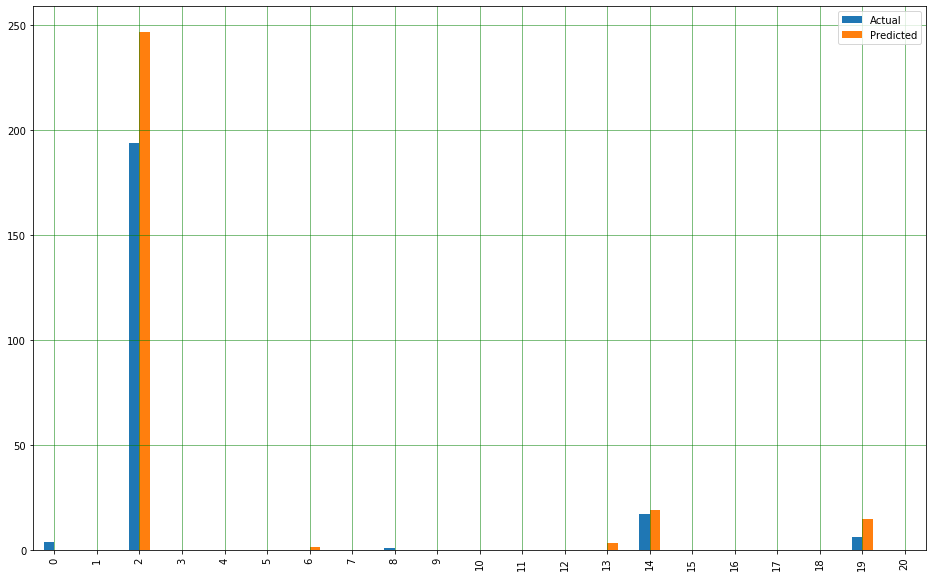

In [176]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

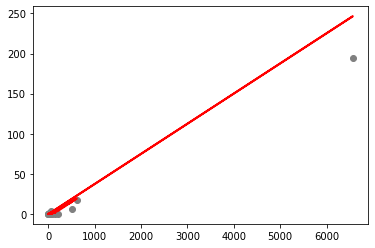

In [177]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [178]:
n = 2000 # you can write your own value instead of 2000 to predict death rate
n= np.asarray(n)
n=np.reshape(n, (-1, 1))
y_pred11 = regressor.predict(n)
if y_pred11 < 0:
    y_pred11 = 0
y_pred11

0

# Cost Function

Calculating mean absolute error

In [179]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.5001875463324192


Calculating mean squared error

In [180]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  

Mean Squared Error: 136.72049023771817


Calculating root mean squared error

In [181]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 11.692753749126771
